<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/30_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 (classification) 문제

여러개의 **종류**(**class** 라고 부릅니다) 중 하나를 구별해 내는 문제를 분류 (**classification**)  라고 부릅니다.  

만약 2개의 클래스중 하나를 고르는 문제를 이진 분류(**binary classification**) 이라고 함




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 생선의 분류 문제

# 데이터 준비
- 예제에서 사용하는 데이터틑 캐글에 공개된 데이터 셋
  - https://www.kaggle.com/datasets/vipullrathod/fish-market  (2024.03 현재)

In [ ]:
base_path = r'/content/drive/MyDrive/dataset'

In [ ]:
file_path = os.path.join(base_path, 'fish.csv')
fish_df = pd.read_csv(file_path)
fish_df

Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]

In [ ]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
""" 컬럼 정보
 Species  생선의 종류 (분류형)
 Weight   생선의 무게 (수치형)
 Length   생선의 길이 (수치형)
 Diagonal 생선의 대각선 길이 (수치형)
 Height   생선의 크기 (수치형)
"""
None

In [ ]:
fish_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
"""
- Perch '농어'
- Bream '도미'
- Roach '로치, Common Roach 잉어과 담수어'
- Pike '강꼬치고기, Northern pike'
- Smelt '빙어'
- Parkki '청돔'
- Whitefish '송어'
"""
None

In [ ]:
fish_df.Species.value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

## Fish(생선) 분류 (classification) 문제
- 생선의 **길이(length)** 와 **무게 (weight)** 만으로 생선의 **종류(species)** 를 자동으로 분류 가능할까?
- 분류할 생선
  - Bream '도미'
  - Smelt '빙어'

# 도미와 빙어 데이터 준비

In [ ]:
# 도미 35 마리

# 길이
bream_length = fish_df[fish_df.Species == 'Bream']['Length'].to_list()
# 무게
bream_weight = fish_df[fish_df.Species == 'Bream']['Weight'].to_list()
print(bream_length)
print(bream_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


In [ ]:
# 빙어 14 마리

# 길이
smelt_length = fish_df[fish_df.Species == 'Smelt']['Length'].to_list()
# 무게
smelt_weight = fish_df[fish_df.Species == 'Smelt']['Weight'].to_list()
print(smelt_length)
print(smelt_weight)

[9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# feature
데이터의 특징/특성
데이터를 표현하는 성질

In [ ]:
# 길이 와 무게 <- 생선 데이터의 특징(feature)

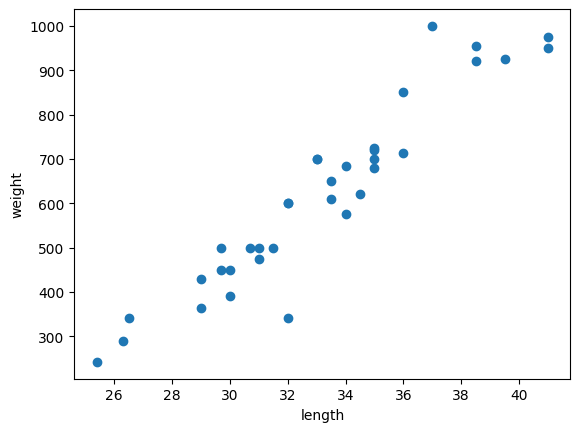

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

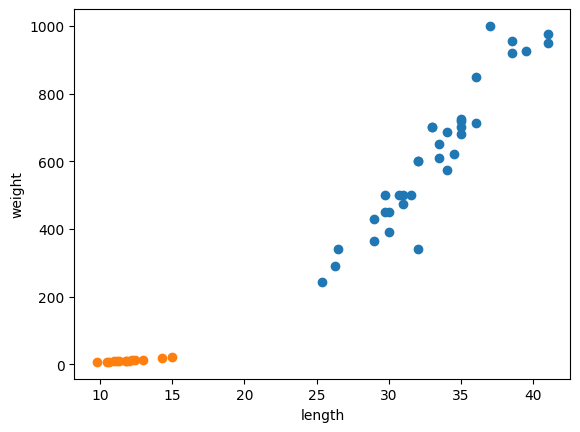

In [ ]:
# 두 생선의 데이터 분포를 한번에 시각화

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
"""
좌 하단이 빙어의 산점도 데이터다.

빙어는 도미에 비해 길이도 무게도 매우 작습니다.
그러나, 그보다 더 중요하게 바라보아야 하는것은 '연관정도'입니다.

빙어도 도미와 비슷하게 길이(length)와 무게(weight)가 비례하지만, '늘어나는 정도'가 조금 다릅니다.
빙어의 산점도도 선형적이긴 하지만, 무게가 길이에 영향을 덜 받는다고 볼 수 있다.
"""
None

# 머신러닝의 입력(input) 데이터 준비
- feature vector 형태로 준비하기


In [ ]:
# k-최근접 이웃 (k-Nearest Neighbors, KNN) 알고리즘을 사용해 도미와 빙어 데이터를 구분해보자

In [ ]:
# 도미와 빙어데이터 합치기
length = bream_length + smelt_length
weight = bream_weigth + smelt_weigth

In [ ]:
"""
scikit-learn 에선 'data'를
각 '특성들' 의 '배열' 형태로 만들어야 한다 -> 2차원 배열

   길이   무게
[   ↓     ↓
  [25.4, 242.0],
  [26.3, 290.0],
  [26.5, 340.0],
  ...
  [15.0, 19.9]
]

- ★ 이를 '입력(input)' 이라고도 하고 'feature vector' 라고도 함.  이는 scikit-learn 뿐 아니라,
  대부분의 프레임워크에서도 이러한 방식의 input 을 사용한다.
"""
None

In [ ]:
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


# 머신러닝의 답안 준비
- 지도학습 (supervised learning) 에선 입력데이터에 대한 **답안** 이 필요하다
- 이를 **label(레이블)** 혹은 **target(타겟)** 이라 한다
- 머신러닝 알고리즘은 이를 계산 가능한 '숫자' 형태로 알려주어야 한다

In [ ]:
# bream는 1로, smelt는 0으로 표현된 답안 준비

# 이진분류 문제에서 0 값의 클래스를 음성클래스, 1 값의 클래스를 양성클래스 라 함

In [ ]:
"""
머신러닝 실무 쪽에서는

입력 data 를 'x' 로, target 을 'y' 로 표기하는 경우가 많다
특히 입력 data 는 'feature 들의 벡터' 라서 대문자 'X' 로 표기하곤 한다.

"""
None

# ※ 현장강의에서는 'x' 와 'X' 가 혼용되면 헷갈릴수 있으니,
#  대문자 'X'는 가급적 사용안하겠습니다.

In [ ]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 머신러닝의 **모델** 준비

> **모델(model)** 이란 <br> 머신러닝 알고리즘을 구현한 프로그램, <br>
혹은, 프로그램은 아니더라도 알고리즘을 (수식등으로) 구체화 하여 표현한 것.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier # KNN 분류 모델

In [ ]:
kn = KNeighborsClassifier()

# ※ scikit-learn 에선 지도학습의 모델을 estimator 라고 통칭한다
#   그 중에서 '분류' 모델을 classifier 라고 한여  변수명을 "clf" 로 작성하는 경우도 많이 본다.

**KNeighborsClassifier**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

```python
class sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5,
  *,
  weights='uniform',
  algorithm='auto',
  leaf_size=30,
  p=2,
  metric='minkowski',
  metric_params=None,
  n_jobs=None)
```


### KNN(k-최근접 이웃, k-Neareset Neighbors 알고리즘) 이란?

어떤 데이터에 대한 답을 구할때 **'주변의 다른 데이터'**를 보고 '다수를 차지하는 것을 정답'으로 사용함.



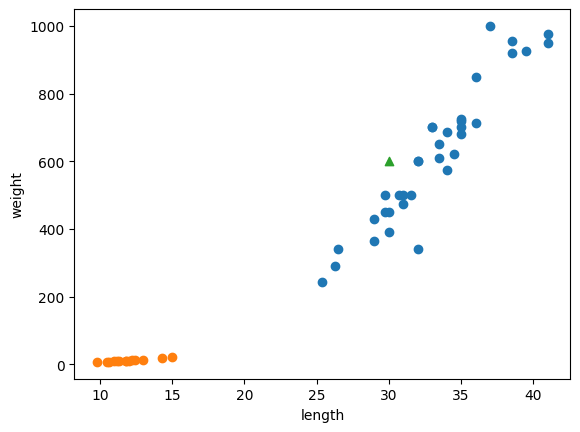

In [ ]:
# 두 생선의 데이터 분포를 한번에 시각화

plt.scatter(bream_length, bream_weigth)
plt.scatter(smelt_length, smelt_weigth)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 모델 학습하기
- 이 과정을 **training(훈련)** 혹은 **fitting (적합)** 한다 라고도 함.
- 주어진 모델에, 주어진 데이터를 통해 규칙을 찾아가는 과정
- 모델 알고리즘을 구성하는 각종 파라미터(parameter) 값들이 입력된 데이터를 학습하면서 최적의 값으로 변화되어 간다


In [ ]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

# 학습한 결과 : 정확도 (accuracy)

In [ ]:
# 얼마나 잘 학습했는지 점수 확인!
# score(data, target) => 0.0 ~ 1.0 사이값  1.0 은 100% 맞춘다는 뜻.
# 이를 accuracy(정확도) 라고 함.

kn.score(fish_data, fish_target)

1.0

# 학습된 모델을 통해 예측(predict)하기
## predict()
- 학습한 모델에 새로이 '관측'된 데이터를 넣어 예측 결과 리턴
- 예측에는 target 값 필요 없다
- predict() 의 입력데이터도 'feature 들의 배열'로 넣어주어야 한다
- 리턴값은 '예측값들의 배열'


In [ ]:
kn.predict([[30, 600]])

array([1])

In [ ]:
kn.predict([
    [30, 600],
    [16,30]
    ])

array([1, 0])

# KNN 의 주요 속성

In [ ]:
"""
KNN 의
장점:  데이터만 있으면 된다.
단점:  데이터가 너무 많으면 사용하기 힘들다 (많은 메모리, 많은 거리 계산,...)
"""
None

In [ ]:
# KNeighborsClassifier 의 속성중
#   _fit_X : 전달한 data 들을 가지고 있다
#   _y : 전달한 target 값들을 가지고 있다.

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
"""
실제로 KNN 알고리즘은 딱히 무엇가 훈련(train) 되는게 없는 셈이다.
fit() 에 전달한 데이터를 저장하고 있다가 새로운 데이터가 등장하면 가장 '가까운 데이터들'을 참고하여
어떤 생선인지만 구분하는 겁니다.

그러면 '가까운 몇개의 데이터'를 참고할게 될까?
이는 n_neighbors 값으로 정해줄수 있다.  (기본값 5)
"""
None

In [ ]:
# 49개의 참조 데이터(35 + 14)
kn49 = KNeighborsClassifier(n_neighbors=49)

# fish_data 49개중 도미가 35개를 차지하므로 어떤 데이터를 넣어도 무조건 '도미' 로 예측하게 된다.
# 오히려 정확도 (accuracy) 가 떨어지게 된다.

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/ 49) # - 위 값은 걍 도미의 개수 / 전체 개수

0.7142857142857143


In [ ]:
# KNN에선 n_neighbors 값이 너무 많게 되면 정확도가 떨어질 수 있다.

In [ ]:
"""
KNeighborsClassifier 의 매개변수들
- n_neighbors: 이웃의 개수
- p : 매개변수 거리 재는 방법.
       1 - 맨해튼 거리
       2 - 유클리디안 거리 (디폴트)

- n_jobs: 사용할 CPU 코어 지정.   이웃간의 거리 계산속도를 높일수는 있지만 fit() 메소드에는 영향이 없다
      1 - 기본값
     -1 - 모든 CPU 코어 사용
"""
None

## n_neighboors=

In [ ]:
# 과연 n_neighbors= 가 몇개일때부터 정확도(accuracy)   가 100% 에 미치지 못할까?

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5,50):
  kn.n_neighbors = n # 최근접 이웃 개수 설정
  score = kn.score(fish_data, fish_target)
  if score <1:
    print(n, score)
    break

18 0.9795918367346939


---
# 훈련 세트 와 테스트 세트

주어진 '문제'와 '답안지' 로 열심히 공부해서 문제집 문제집 100점 맞으면 그 학생은 잘한다 할수 있나?

진짜 잘하는지는 '문제집에 없던 문제'들을 풀어도 점수가 좋아야 한다.

그래서 data 와 target을 학습(training) 하는데 다 집어 넣는 것이 아니라, 훈련세트와 테스트세트를 나누어서 모델 훈련 및 검증에 사용한다

- 훈련 (training) 세트 : 모델 훈련 용 데이터 셋
- 테스트 (test) 세트 : 모델 평가(검증) 용 데이터 셋

![](https://pozalabs.github.io/assets/images/Dataset_Splitting/data_split.jpg)

## 샘플링 편향 문제

In [ ]:
# 일부 데이터를 추출 -> sample(샘플)이라함
fish_data[4]

[29.0, 430.0]

In [ ]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
print(fish_data[-5:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
"""

데이터의 처음 35개를 train 세트 (훈련세트),  나머지 14개를 test 세트 (테스트 세트)로 사용해보도록 해보자

[
  [25.4, 242.0], ─┐
  [26.3, 290.0],  │ train 세트 35개
  [26.5, 340.0],  │
  ...            ─┘
  ...            ─┐
  ...             │ test 세트 14개
  [15.0, 19.9]   ─┘
]

"""
None

In [ ]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn.fit(train_input, train_target) # 훈련용 데이터로 학습
kn.score(test_input, test_target) # 테스트용 데이터로 평가

0.0

In [ ]:
"""
↑ 정확도 가 0.0 이 나왔다.  하나도 맞추지 못하고 있다?!  왜 그럴까?

바로 '샘플링 편향 (sampling bias)' 문제다

train 세트에 도미 만 잔뜩 있어서 이를 훈련시키고
test 세트에는 빙어 만 잔뜩 있었으니 결과는 0 이 나온거다

해결 -> 골고루 섞어야 한다
"""
None


# 데이터 shuffle

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
input_arr.shape

(49, 2)

In [ ]:
# random index 생성
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [ ]:
input_arr[[1, 3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [ ]:
# train 세트
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
# test 세트
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

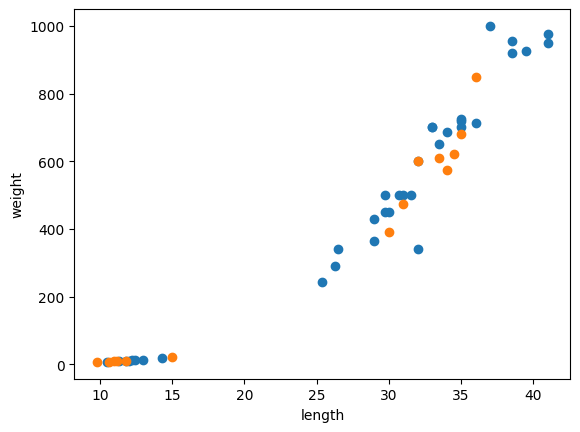

In [ ]:
# train 세트와 test 세트가 적적히 섞였는지 시각화 확인

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리

In [ ]:
# 길이 25cm  무게 150g  인데.  학습된 모델이 '빙어(0)' 라고 예측한다?
kn.predict([[25,150]])

array([0])

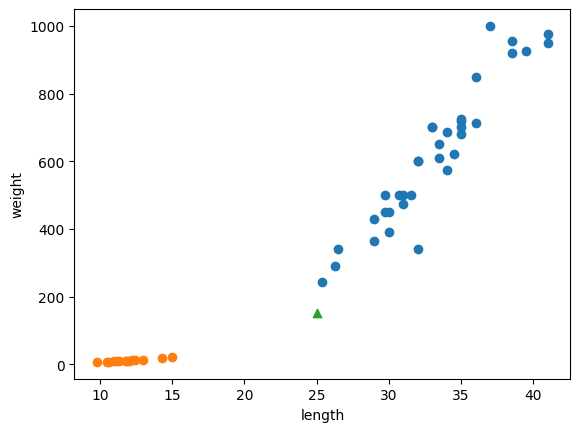

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
# 도미35, 빙어14 feature 합쳐놓기
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## train_test_split()
훈련세트와 테스트세트 나누기

In [ ]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
```python
sklearn.model_selection.train_test_split(
  *arrays,
  test_size=None, train_size=None, random_state=None, shuffle=True,
  stratify=None)
```



In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [ ]:
# 주어진 data 와 target 을 무작위로 섞은뒤 train:test 를 3:1 로 분리  (디폴트)
# 학습 예제시 동일 결과를 내기 위해 ransom_state 값을 줌

In [ ]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# stratify= 매개변수에 target 전달 -> 클래스 비율에 맞게 데이터 분리

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify= fish_target, random_state=42)

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict([[25,150]]) # 여전히 0??

array([0.])

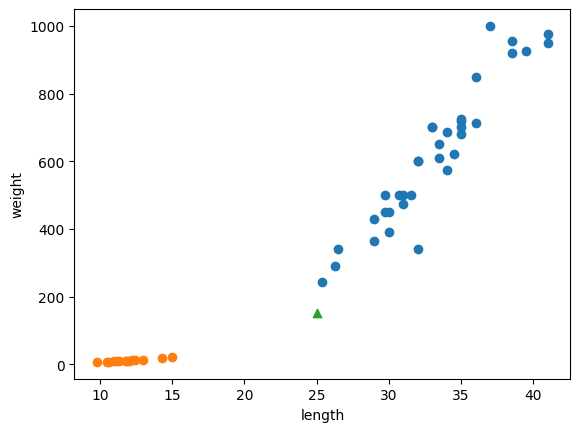

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
"""
분명히 (25, 150) 은 빙어(0) 보다 도미(1) 에 가까이 있다.
그런데 왜 모델은 멀리 떨어진 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단한걸까?

KNN 은 주변의 샘플 중에서 '다수' 인 클래스를 예측으로 사용합니다.
이 샘플(25, 150)의 주변샘플은 어떠한 것들이 있는지 들여다 봅시다.

kneighbors() 메소드를 통해 할수 있다
"""
None

In [ ]:
distances, indexs = kn.kneighbors([[25,150]])

# kneighbors() 는 이웃까지의 거리(들)과 이웃 샘플에 대한 인덱스(들)을 리턴함
# 현재 n_neighbors 는 기본값 5 이기 때문에 5개의 neighbor 들이 리턴된다

In [ ]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [ ]:
indexs

array([[21, 33, 19, 30,  1]])

In [ ]:
# array([[21, 33, 19, 30,  1]])
# 과연 위 인덱스들의 데이터가 어떤 데이터일까? -> 시각화

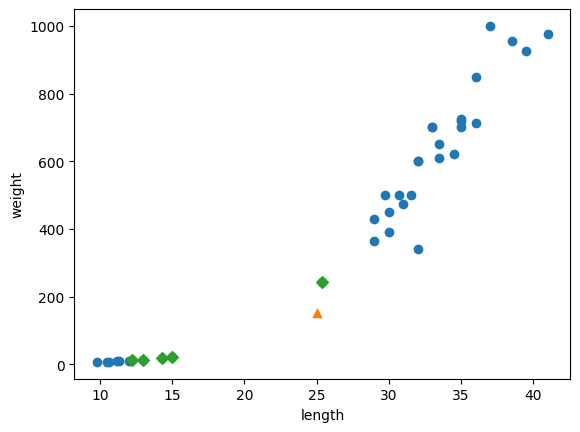

In [ ]:
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexs])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexs])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [ ]:
"""
위 scatter plot 을 살펴보면,  첫번째 샘플과의 거리가 92이고, 그외 가까운 샘플들은 모두 130, 138 이다.
그런게...  그래프에 보여진 거리 비율이 이상하지 않나요?
어림짐작으로 보아도 92 보다 족히 몇배는 되어 보이는데, 겨우 거리가 130이라니?  수상하다?

눈치 채셨나요?
x 축의 범위와 y 축의 범위가 다르다!
x축 (length)의 범위는 (10 ~ 40)
y축 (weight)의 범위는 (0 ~ 1000) x축보다 더 넓다!

따라서 y 축으로 조금만 멀어져도 '거리'가 아주 큰 값으로 계산된다. 그래서 가까이 보이는 도미 샘플이 이웃으로 선택되지 못한거다

이를 눈으로 명확하게 확인하기 위해 x축의 범위도 동일하게 0 ~ 1000으로 맞추어 보자.
"""
None

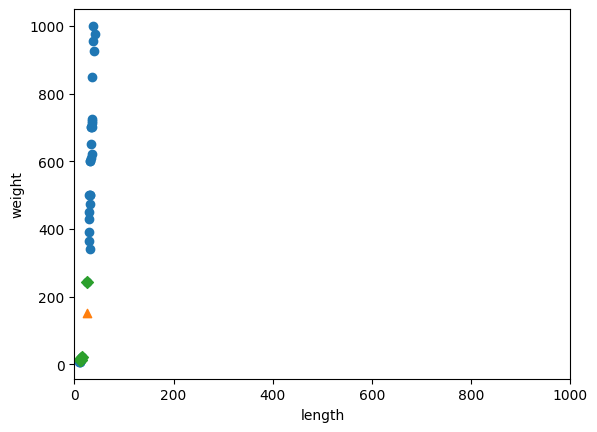

In [ ]:
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.xlim((0, 1000)) # x 축도 0- 1000 으로 맞추어 보자
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
"""
두 개의  feature(특성), 즉 length 와 weight 의 값이 놓인 범위가 매우 다르다.
이를 두 feature 의 'scale(스케일)이 다르다' 라고도 말합니다.

특성간 스케일이 다른 일은 얼마든지 있을수 있습니다.
어떤 사람이 방의 넓이를 재는데, 세로는 cm 로  가로는 inch 로 쟀다면 정사각형인 방도 직사각형처럼 보일겁니다

데이터를 표현하는 기준이 다르면, 머신러닝 알고리즘이 제대로 학습되고 제대로 예측하기 힘듭니다.
(특히 KNN 과 같이 '거리' 기반이라면 더더욱..)

따라서!
feature 들이 머신러닝에서 서로 '동등한 영향력'을 행사하도록 할려면 일정한 기준으로 맞추어야 한다
이러한 작업들을 데이터 전처리 (data preprocessing) 이라 하고,
feature 들을 일정한 기준으로 맞추는 작업을 스케일링(scaling) 한다고 함


"""
None

In [ ]:
"""
스케일링의 대표적인 방법 2가지
- 표준화 (standardazation)
- 정규화 (normalization)

표준점수 (standard score) 를 사용하여 표준화를 해봅시다
표준점수는 z 점수라고도 합니다
표준점수는 각 feature 값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타냄.
        이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능.
"""
None

In [ ]:
# 평균을 빼고 표준편차를 나누어주면 된다

# train_input <-(36, 2) 특성마다 스케일이 다르므로 평균과 표준편차는 특성별로 계산해야함
# axis=0 을 지정 <- '행' 을 따라 각 열(feature)의 통계값 계산

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
print(mean, std)

# 각 feature 마다 평균과 표준편차가 구해졌다

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
# 원본데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환
train_scaled = (train_input - mean) / std

In [ ]:
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


## 전처리 데이터로 모델 훈련하기

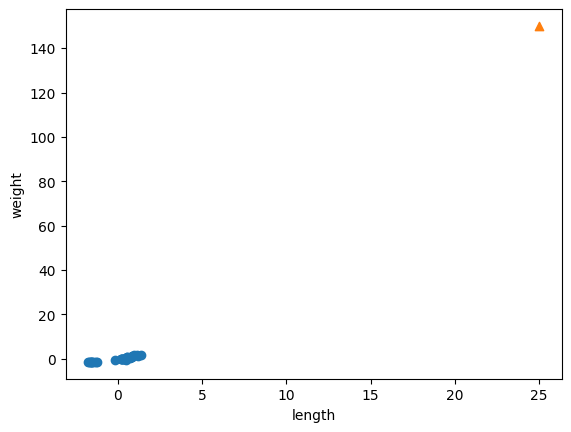

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#이렇게 된이유는?
#train 세트를 mean(평균) 으로 빼고 std(표준편차)로 나누어 주었기 때문에
#값의 범위'가 크게 달라졌습니다.
#따라서! 샘플 [25, 150] 을 동일한 비율로 변환하지 않으면 이런 현상이 발생한다
#명심!
#반드시 train 세트의 mean, std 를 이용해서 '샘플도 변환'해야 한다!

In [ ]:
new = ([25,150] - mean) / std
new

array([-0.23012627, -0.94060693])

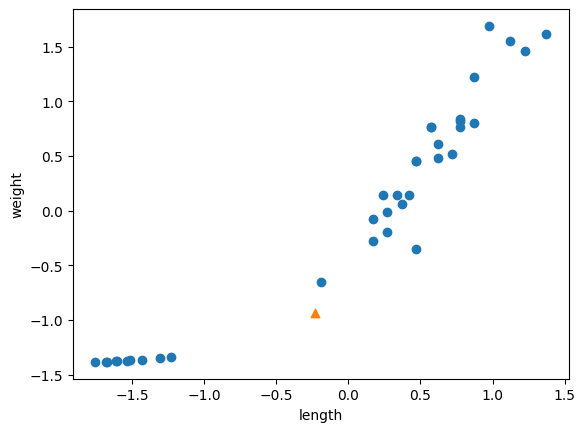

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
# test 세트로 평가할때도 'train 세트'의 평균과 표준편차로 변환해야 같은 비율로 산점도를 그릴수 있다.

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
kn.predict([new])

array([1.])

In [ ]:
distances, indexs = kn.kneighbors([new])

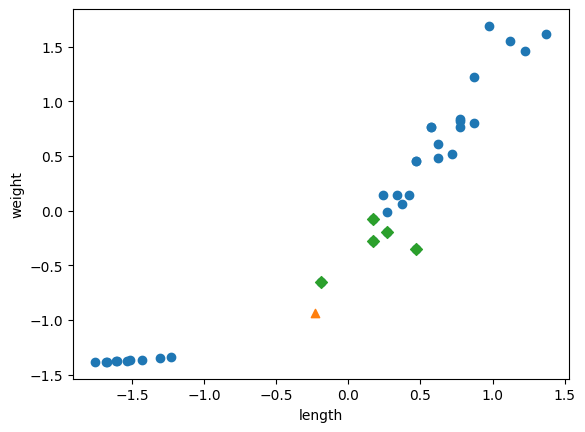

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexs, 0], train_scaled[indexs,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
fish_df.describe()

Weight      Length    Diagonal      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   28.415723   31.227044    8.970994    4.417486
std     357.978317   10.716328   11.610246    4.286208    1.685804
min       0.000000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   63.400000   68.000000   18.957000    8.142000

In [ ]:
# balanced vs. imbalanced  확인
# outlier 확인
# 전처리 scaling 필요성 여부 확인


# 정리 (일단 여기까지)
1. 데이터 준비
1. 훈련세트 - 테스트세트 나누기 (섞기)
1. 전처리하기 (스케일링)
1. 모델 생성, 학습
1. 결과 평가 (정확도)
1. 예측 해보기


# 모델 저장, 불러오기

In [ ]:
import joblib # 파이썬 객체를 바이너리로 저장 (*pkl)

In [ ]:
savedir = os.path.join(base_path, 'out')
if not os.path.exists(savedir):
  os.makedirs(savedir)
  print('out 디렉토리 생성')
else:
  print('out 디렉토리가 있습니다')

out 디렉토리가 있습니다


In [ ]:
savefile = 'kn.pkl'
joblib.dump(kn, os.path.join(savedir, savefile))

['/content/drive/MyDrive/dataset/out/kn.pkl']

In [ ]:
# 저장된 모델 불러오기
kn = None

In [ ]:
kn = joblib.load(os.path.join(savedir, savefile))

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 새로이 관측된 생성
new = ([30, 180] - mean) / std # 예측하기 위해선 동일한 스케일링 해야함
new

array([ 0.27075315, -0.84781355])

In [ ]:
kn.predict([new])

array([1.])

In [ ]:
new = ([10, 9] - mean) / std # 예측하기 위해선 동일한 스케일링 해야함
kn.predict([new])

array([0.])